# Project: Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, you and your friend decide to break into the industry and open up your own restaurant, Danielle's Delicious Delicacies. Since a restaurant's success is highly correlated with its reputation, you want to make sure Danielle's Delicious Delicacies has the best reviews on the most queried restaurant review site: Yelp! While you know your food will be delicious, you think there are other factors that play into a Yelp rating and will ultimately determine your business's success. With a dataset of different restaurant features and their Yelp ratings, you decide to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for your restaurant!

In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business


## Loading the Data 


In [1]:
import pandas as pd

businesses = pd.read_json('yelp_business.json',lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)

In [2]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,...,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",...,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",...,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",...,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,...,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",...,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [3]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [4]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [5]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...",1,4


In [6]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [7]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


How many different businesses are in the dataset? What are the different features in the review DataFrame?

In [8]:
print(len(businesses))
print(reviews.columns)

188593
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


What is the range of values for the features in the user DataFrame?

In [11]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


In [12]:
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

 What feature, or column, do the DataFrames have in common?

## Merge the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. 

In [13]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


In [14]:
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

In [15]:
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


## Clean the Data

We are getting really close to the fun analysis part! We just have to clean our data a bit so we can focus on the features that might have predictive power for determining an establishment's Yelp rating.


In [16]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

In [17]:
#Cheacking For Null Values
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [18]:
#Filling missing Data with 0
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

In [19]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Exploratory Analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). 

In [57]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating. In the cell below we have provided the code to import Matplotlib. We can use Matplotlib's `.scatter()` method with the below syntax to plot what these correlations look like:

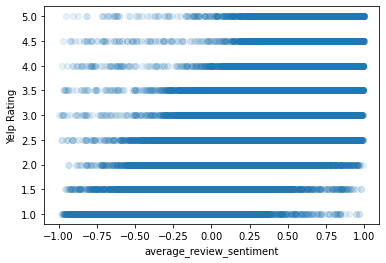

In [20]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()

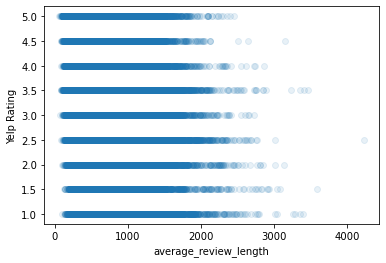

In [21]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'],df['stars'],alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()

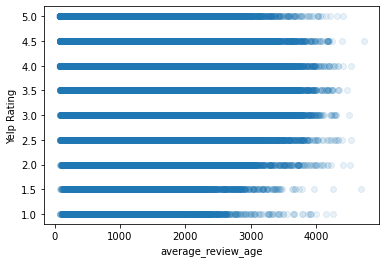

In [22]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'],df['stars'],alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()

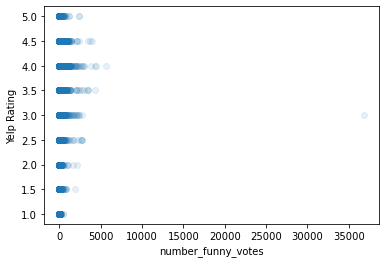

In [23]:
# plot number_funny_votes against stars here
plt.scatter(df['number_funny_votes'],df['stars'],alpha=0.1)
plt.xlabel('number_funny_votes')
plt.ylabel('Yelp Rating')
plt.show()

Why do you think `average_review_sentiment` correlates so well with Yelp rating?

## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`

In [27]:
features = df[['average_review_length','average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets



In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

## Create and Train the Model


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Evaluate and Understand the Model



In [31]:
model.score(X_train,y_train)

0.08250309566544889

In [32]:
model.score(X_test,y_test)

0.08083081210060561

In [33]:
y_predicted = model.predict(X_test)

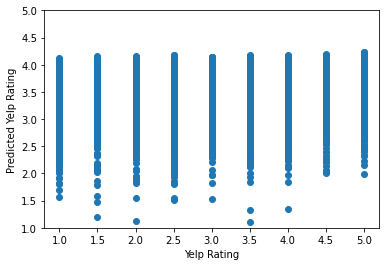

In [34]:
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

## Define Different Subsets of Data

After evaluating the first model, you can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating.

In [35]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [36]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [37]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [38]:
# all features
all_features = binary_features + numeric_features

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. 

In [39]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749586)]


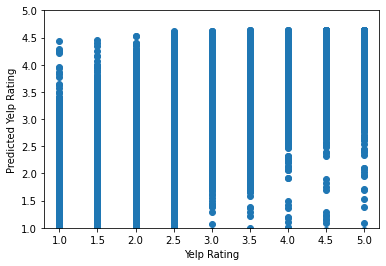

In [77]:
# create a model on sentiment here
model_these_features(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208039676), ('alcohol?', -0.14549670708138332), ('has_wifi', -0.13187397577762547), ('good_for_kids', -0.08632485990337231), ('takes_credit_cards', 0.07175536492195614), ('take_reservations', 0.04526558530451594)]


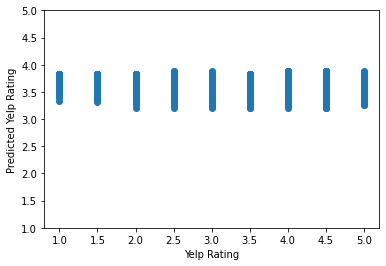

In [40]:
# create a model on all binary features here
model_these_features(binary_features)

Train Score: 0.673499259376666
Test Score: 0.6713318798120138
[('average_review_sentiment', 2.2721076642097686), ('price_range', -0.0804608096270259), ('average_number_years_elite', -0.07190366288054195), ('average_caption_length', -0.00334706600778316), ('number_pics', -0.0029565028128950613), ('number_tips', -0.0015953050789039144), ('number_cool_votes', 0.0011468839227082779), ('average_number_fans', 0.0010510602097444858), ('average_review_length', -0.0005813655692094847), ('average_tip_length', -0.0005322032063458541), ('number_useful_votes', -0.00023203784758702592), ('average_review_count', -0.00022431702895061526), ('average_review_age', -0.0001693060816507226), ('average_days_on_yelp', 0.00012878025876700503), ('weekday_checkins', 5.918580754475574e-05), ('weekend_checkins', -5.518176206986478e-05), ('average_number_friends', 4.826992111594799e-05), ('review_count', -3.48348376378989e-05), ('number_funny_votes', -7.884395674183897e-06)]


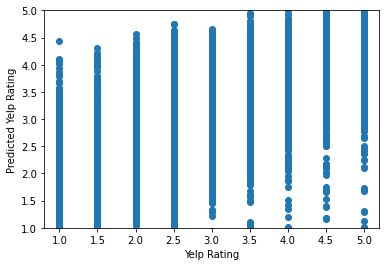

In [41]:
# create a model on all numeric features here
model_these_features(numeric_features)

Train Score: 0.6807828861895333
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.280845699662378), ('alcohol?', -0.14991498593470778), ('has_wifi', -0.12155382629262777), ('good_for_kids', -0.11807814422012647), ('price_range', -0.06486730150041178), ('average_number_years_elite', -0.0627893971389538), ('has_bike_parking', 0.027296969912285574), ('takes_credit_cards', 0.02445183785362615), ('take_reservations', 0.014134559172970311), ('number_pics', -0.0013133612300815713), ('average_number_fans', 0.0010267986822657448), ('number_cool_votes', 0.000972372273441118), ('number_tips', -0.0008546563320877247), ('average_caption_length', -0.0006472749798191067), ('average_review_length', -0.0005896257920272376), ('average_tip_length', -0.00042052175034057535), ('number_useful_votes', -0.00027150641256160215), ('average_review_count', -0.00023398356902509327), ('average_review_age', -0.00015776544111326904), ('average_days_on_yelp', 0.00012326147662885747), ('review_count', 0.00

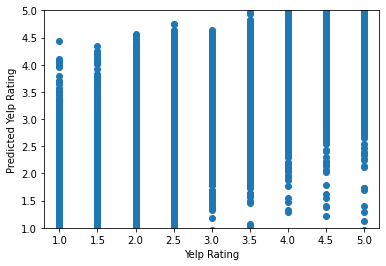

In [42]:
# create a model on all features here
model_these_features(all_features)

Train Score: 0.6807828863691388
Test Score: 0.6782129484118526
[('average_review_sentiment', 604097251.6675243), ('average_review_sentiment', -604097249.3866779), ('alcohol?', -0.149913517538097), ('has_wifi', -0.12155397123754609), ('good_for_kids', -0.1180876422481205), ('price_range', -0.06486668520449251), ('average_number_years_elite', -0.062789453724884), ('has_bike_parking', 0.02729213408515079), ('takes_credit_cards', 0.024448618991481152), ('take_reservations', 0.014132749857475828), ('number_pics', -0.0013134303114603445), ('average_number_fans', 0.0010269866325149637), ('number_cool_votes', 0.0009722755969053229), ('number_tips', -0.0008546744564404135), ('average_caption_length', -0.0006466927673406094), ('average_review_length', -0.0005896201765779515), ('average_tip_length', -0.00042054962843902645), ('number_useful_votes', -0.000271546192666319), ('average_review_count', -0.00023398394031617746), ('average_review_age', -0.00015777363115590165), ('average_days_on_yelp', 0

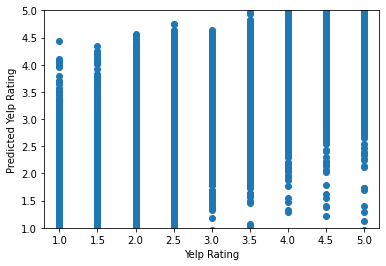

In [46]:
# create a model on your feature subset here
feature_subset = sentiment + all_features 
model_these_features(feature_subset)



We have successfully built a linear regression model that predicts a restaurant's Yelp rating! As we have seen, it can be pretty hard to predict a rating like this even when we have a plethora of data. 